In [101]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder


preprocessing

In [102]:
preDF = pd.read_csv('preCovid_crime.csv')
#preDF = pd.read_csv('preCovid_crime.csv', usecols = range(1,25))
postDF = pd.read_csv('Covid_crime.csv')
#postDF = pd.read_csv('Covid_crime.csv', usecols = range(1,25))

#preDF['year'] = pd.DatetimeIndex(preDF['date']).year
#preDF['month'] = pd.DatetimeIndex(preDF['date']).month
#preDF['day'] = pd.DatetimeIndex(preDF['date']).day
#preDF['covid_daily_case_count'] = 0
#preDF['covid_deaths'] = 0
#postDF['year'] = pd.DatetimeIndex(postDF['date']).year
#postDF['month'] = pd.DatetimeIndex(postDF['date']).month
#postDF['day'] = pd.DatetimeIndex(postDF['date']).day
preDF = preDF.drop(columns = ['date', 'DISTRICT'])
postDF = postDF.drop(columns = ['date', 'DISTRICT'])
preDF = pd.get_dummies(preDF, columns = ['SHIFT', 'METHOD', 'OFFENSE'], prefix = ['shift','method','offense'])
postDF = pd.get_dummies(postDF, columns = ['SHIFT', 'METHOD', 'OFFENSE'], prefix = ['shift','method','offense'])

split pre-covid

In [103]:
preX = preDF.loc[:, preDF.columns != 'WARD'].values
preY = preDF['WARD'].values


pre_x_train, pre_x_test, pre_y_train, pre_y_test = train_test_split(preX, preY, test_size = .2, random_state = 12345)

split during/post-covid

In [104]:
postX = postDF.loc[:, postDF.columns != 'WARD'].values
postY = postDF['WARD'].values


post_x_train, post_x_test, post_y_train, post_y_test = train_test_split(postX, postY, test_size = .2, random_state = 12345)

In [105]:
preclf = RandomForestClassifier(n_estimators = 2000, max_depth = 5)
postclf = RandomForestClassifier(n_estimators = 2000, max_depth = 5)

#preclf.fit(preX, preY.ravel())
#postclf.fit(postX, postY.ravel())
preclf.fit(pre_x_train, pre_y_train.ravel())
postclf.fit(post_x_train, post_y_train.ravel())

RandomForestClassifier(max_depth=5, n_estimators=2000)

# Pre Importances

<AxesSubplot:>

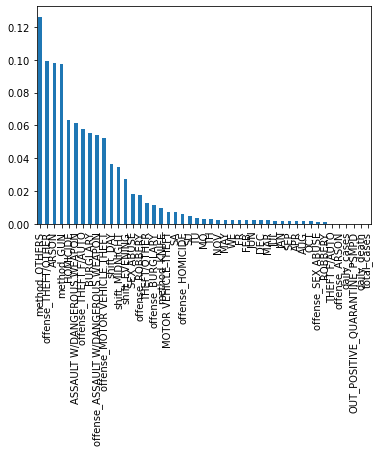

In [106]:
importance = pd.Series(preclf.feature_importances_, index = preDF.columns[1:]).sort_values(ascending = False)
importance.plot(kind='bar')

In [125]:
importance

method_OTHERS                         0.155363
ARSON                                 0.110221
HOMICIDE                              0.097509
BURGLARY                              0.062917
shift_MIDNIGHT                        0.041289
method_GUN                            0.032535
THEFT/OTHER                           0.029627
shift_DAY                             0.027966
SEX ABUSE                             0.025702
shift_EVENING                         0.021167
SU                                    0.020189
ASSAULT W/DANGEROUS WEAPON            0.019929
SA                                    0.019812
FEB                                   0.019639
NOV                                   0.019370
JUN                                   0.018948
MAR                                   0.018801
SEP                                   0.018586
DEC                                   0.018380
MAY                                   0.018218
JUL                                   0.017952
JAN          

# Post importances

<AxesSubplot:>

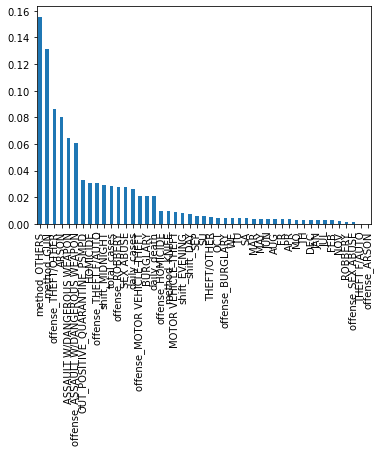

In [108]:
importance = pd.Series(postclf.feature_importances_, index = postDF.columns[1:]).sort_values(ascending = False)
importance.plot(kind='bar')

In [109]:
importance

method_OTHERS                         0.155560
method_GUN                            0.131648
offense_THEFT/OTHER                   0.086446
ARSON                                 0.080219
ASSAULT W/DANGEROUS WEAPON            0.064312
offense_ASSAULT W/DANGEROUS WEAPON    0.061065
OUT_POSITIVE_QUARANTINE_PSMPD         0.032741
HOMICIDE                              0.030979
offense_THEFT F/AUTO                  0.030798
shift_MIDNIGHT                        0.029301
total_cases                           0.028271
offense_ROBBERY                       0.027783
SEX ABUSE                             0.027401
daily_cases                           0.026421
offense_MOTOR VEHICLE THEFT           0.020876
BURGLARY                              0.020726
daily_death                           0.020682
offense_HOMICIDE                      0.009952
method_KNIFE                          0.009797
MOTOR VEHICLE THEFT                   0.009069
shift_EVENING                         0.008125
shift_DAY    

# Combined Importances

In [110]:
combinedDF = pd.concat([preDF, postDF])

In [123]:
combinedX = combinedDF.loc[:, combinedDF.columns != 'WARD'].values
combinedY = combinedDF['WARD'].values

(combined_x_train, combined_x_test,
 combined_y_train, combined_y_test) = train_test_split(combinedX, combinedY, test_size = .2, random_state = 12345)

combinedclf = RandomForestClassifier(n_estimators = 2000, max_depth = 5)
combinedclf.fit(combined_x_train, combined_y_train.ravel())

RandomForestClassifier(max_depth=5, n_estimators=2000)

<AxesSubplot:>

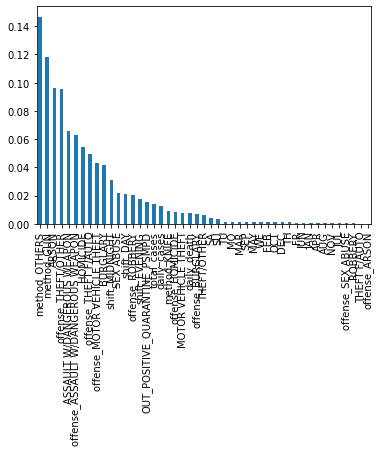

In [112]:
importance = pd.Series(combinedclf.feature_importances_, index = combinedDF.columns[1:]).sort_values(ascending = False)
importance.plot(kind='bar')

In [113]:
count = 0

for value in importance:
    print(importance.index[count], str(value))
    count += 1

method_OTHERS 0.14675417216829462
method_GUN 0.11799048209484518
ARSON 0.0962952005174302
offense_THEFT/OTHER 0.09561422458799819
ASSAULT W/DANGEROUS WEAPON 0.06599980040462479
offense_ASSAULT W/DANGEROUS WEAPON 0.06289087725798229
HOMICIDE 0.05416633072445336
offense_THEFT F/AUTO 0.049467332044251015
offense_MOTOR VEHICLE THEFT 0.04323633304045632
BURGLARY 0.0417945765457152
shift_MIDNIGHT 0.03089702044661327
SEX ABUSE 0.021919912432735635
shift_DAY 0.021264610740064024
offense_ROBBERY 0.020372223397268123
shift_EVENING 0.017538979527215795
OUT_POSITIVE_QUARANTINE_PSMPD 0.015759263044893265
total_cases 0.013895354157073176
daily_cases 0.012619976539334199
method_KNIFE 0.008754540152033141
offense_HOMICIDE 0.008353778366492494
MOTOR VEHICLE THEFT 0.007780790305001148
daily_death 0.007628393565950202
offense_BURGLARY 0.006784570697569772
THEFT/OTHER 0.006120528116921745
SA 0.004012503899911829
SU 0.003303236053781022
TU 0.0016068017204781877
MO 0.0013834634556603072
MAR 0.00132733770426

# Predictions

In [114]:
#using pre data to predict post
y_pred = preclf.predict(post_x_test)

print(metrics.accuracy_score(post_y_test, y_pred))

0.18888888888888888


In [115]:
#using post data to predict pre
y_pred = postclf.predict(pre_x_test)

print(metrics.accuracy_score(pre_y_test, y_pred))

0.1762583004523145


In [121]:
#Just curious
#using pre data to predict pre

y_pred = preclf.predict(pre_x_test)

print(metrics.accuracy_score(pre_y_test, y_pred))

0.22505052449234914


In [122]:
#using post data to predict post

y_pred = postclf.predict(post_x_test)
print(metrics.accuracy_score(post_y_test, y_pred))

0.20335648148148147


In [124]:
#combined
y_pred = combinedclf.predict(combined_x_test)

print(metrics.accuracy_score(combined_y_test, y_pred))

0.21602882196995446
